<div class="alert alert-block alert-success">
    <h1 align="center">Sentiment Analysis</h1>
    <h3 align="center">On</h3>
    <h3 align="center">... Review.csv dataset ...</h3>
    <h3 align="center">"Task Four"</h3>
    <h4 align="center"><a href="http://www.github.com/omid-asadi">Omid Asadi</a></h5>
    <h4 align="center">student number: 970149637</h4>
</div>

#  Tasks for this week contains:
 <b>A. Data Cleaning <br>
 B. Data Tokenizing<br>
 C. Word Embedding Word2Vec<br>
 D. Manipulating the Features dimension to be ready for SVM approach with calculating Average to be fit.   
 E. Applying SVM Support Vector Machine <br>
 F. Evaluation & Confusion Matrix Part</b><br>
   <img src=" https://miro.medium.com/max/1300/0*m355u3-pHvd5DsLA.png" width="358" height="auto" width="100%" 
 align="left"/> </p>

  <img src=" https://repository-images.githubusercontent.com/1349775/202c4680-8f7c-11e9-91c6-745fdcbeffe8" width="358" height="auto" width="100%" 
 align="center"/> </p>



In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup 
from nltk.stem.porter import PorterStemmer
from nltk.stem        import WordNetLemmatizer
import re
from nltk.corpus import stopwords
import logging
from gensim.models import word2vec
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC, SVC

<div class="alert alert-block alert-success">
    <h1 align="center"> ... Loading the Data ... </h1>
<br>
</div>

In [27]:
data = pd.read_csv("review.csv", encoding='latin-1')
data.rename(columns={'review':'SentimentText','sentiment':'Sentiment'},inplace=True)

 <b>                   <br>

###  Check the Relativity Status Between Positives & Negatives:


 1    694
-1    692
Name: Sentiment, dtype: int64


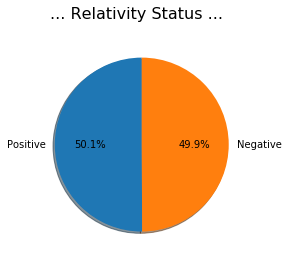

In [28]:
relativity = data['Sentiment'].value_counts(dropna=False)
print(relativity)
print("==========================")

labels = 'Positive', 'Negative'
fig1, ax1 = plt.subplots()
fig1.suptitle('... Relativity Status ...', fontsize=16)
ax1.pie(relativity, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

<div class="alert alert-block alert-success">
    <h1 align="center"> Preprocessing Part </h1>
    <h3 align="center">.......... Data Cleaning .........</h3>

</div>

In [29]:
def review_wordlist(review, remove_stopwords=False):
    
    review_text = BeautifulSoup(review).get_text()
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    words = review_text.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))     
        words = [w for w in words if not w in stops]
    
    return(words)

In [30]:
data = data[data['SentimentText'].isnull() == False]

#lower string
data['SentimentText'] = data['SentimentText'].str.lower()

#remove email adress
data['SentimentText'] = data['SentimentText'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+', '', regex=True)

#remove IP address
data['SentimentText'] = data['SentimentText'].replace('((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}', '', regex=True)

#remove punctaitions and special chracters
data['SentimentText'] = data['SentimentText'].str.replace('[^\w\s]','')

#remove numbers
data['SentimentText'] = data['SentimentText'].replace('\d', '', regex=True)
print(data.shape)


(1386, 2)


<div class="alert alert-block alert-success">
    <h2 align="center"> ... Spliting Data ... </h2>
<br>
</div>

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data['SentimentText'].values.astype('U'),data['Sentiment'].values.astype('int32'), test_size=0.10, random_state=0)
classes  = data['Sentiment'].unique()

In [32]:
import nltk.data

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [33]:
def review_sentences(review, tokenizer, remove_stopwords=True):

    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(review_wordlist(raw_sentence,\
                                            remove_stopwords))
            
    return sentences

In [34]:
sentences = []
print("Parsing sentences from training set")
for review in x_train:
    sentences += review_sentences(review, tokenizer)

Parsing sentences from training set



<div class="alert alert-block alert-success">
    <h2 align="center"> ... Builidng word2vec vocabulary ... </h2>
        <h2 align="center">  &  </h2>
    <h2 align="center"> ... Importing Google Gensim W2V ... </h2>

<br>
</div>

In [35]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [36]:
num_features = 300  
min_word_count = 40 
num_workers = 4     
context = 10        
downsampling = 1e-3 

# Initializing the train model
print("Training model....")
model = word2vec.Word2Vec(sentences,\
                          workers=num_workers,\
                          size=num_features,\
                          min_count=min_word_count,\
                          window=context,
                          sample=downsampling)

model.init_sims(replace=True)

model_name = "300features_40minwords_10context"
model.save(model_name)

2020-01-16 17:52:48,849 : INFO : collecting all words and their counts
2020-01-16 17:52:48,851 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-01-16 17:52:48,959 : INFO : collected 38077 word types from a corpus of 446902 raw words and 1247 sentences
2020-01-16 17:52:48,960 : INFO : Loading a fresh vocabulary
2020-01-16 17:52:48,987 : INFO : effective_min_count=40 retains 1968 unique words (5% of original 38077, drops 36109)
2020-01-16 17:52:48,988 : INFO : effective_min_count=40 leaves 281823 word corpus (63% of original 446902, drops 165079)
2020-01-16 17:52:48,996 : INFO : deleting the raw counts dictionary of 38077 items
2020-01-16 17:52:48,998 : INFO : sample=0.001 downsamples 40 most-common words
2020-01-16 17:52:48,998 : INFO : downsampling leaves estimated 265709 word corpus (94.3% of prior 281823)
2020-01-16 17:52:49,007 : INFO : estimated required memory for 1968 words and 300 dimensions: 5707200 bytes
2020-01-16 17:52:49,008 : INFO : resetting

Training model....


2020-01-16 17:52:49,055 : INFO : training model with 4 workers on 1968 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2020-01-16 17:52:49,319 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-01-16 17:52:49,321 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-16 17:52:49,324 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-16 17:52:49,340 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-01-16 17:52:49,342 : INFO : EPOCH - 1 : training on 446902 raw words (265661 effective words) took 0.3s, 947524 effective words/s
2020-01-16 17:52:49,646 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-01-16 17:52:49,654 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-01-16 17:52:49,660 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-01-16 17:52:49,663 : INFO : worker thread finished; awaiting finish of 0 

In [37]:
model.wv.doesnt_match("man woman dog child ".split() )

E:\App\Installed\Anaconda\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'man'

In [38]:
model.wv.doesnt_match("king woman man".split())


'king'

In [39]:
# This will print the most similar words present in the model
model.wv.most_similar("man")


[('love', 0.969670295715332),
 ('wife', 0.9571605920791626),
 ('father', 0.9448466300964355),
 ('mother', 0.9351049065589905),
 ('young', 0.9220728874206543),
 ('girl', 0.9143781661987305),
 ('woman', 0.9120641350746155),
 ('son', 0.908173680305481),
 ('life', 0.9072244763374329),
 ('finds', 0.9003933668136597)]

In [40]:
model.wv.most_similar("awful")


[('clever', 0.9993911981582642),
 ('storyline', 0.9992851614952087),
 ('horrible', 0.9992677569389343),
 ('realistic', 0.9991623163223267),
 ('pleasure', 0.9989714622497559),
 ('standard', 0.9989585876464844),
 ('clich', 0.9989444017410278),
 ('mess', 0.9988400340080261),
 ('cliched', 0.998835563659668),
 ('bland', 0.998741865158081)]

In [41]:
model.wv.syn0.shape

E:\App\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


(1968, 300)


<div class="alert alert-block alert-success">
    <h2 align="center"> ... Calculating the Average feature vectors ... </h2>
<br>
</div> 
    
    

In [42]:
def featureVecMethod(words, model, num_features):

    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [43]:
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        
        if counter%100 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

# Average of Train Data...
* According to the shape of our features, a very common choice is calculating the average of each feature in Train and Test data for importing them into the our SVM model.

In [44]:
clean_train_reviews = []
for review in x_train:
    clean_train_reviews.append(review_wordlist(review, remove_stopwords=True))
    
trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)

Review 0 of 1247
Review 100 of 1247
Review 200 of 1247
Review 300 of 1247


E:\App\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


Review 400 of 1247
Review 500 of 1247
Review 600 of 1247
Review 700 of 1247
Review 800 of 1247
Review 900 of 1247
Review 1000 of 1247
Review 1100 of 1247
Review 1200 of 1247


# Average of Test Data...
* According to the shape of our features, a very common choice is calculating the average of each feature in Train and Test data.

In [45]:
# Calculating average feature vactors for test set     
clean_test_reviews = []
for review in x_test:
    clean_test_reviews.append(review_wordlist(review,remove_stopwords=True))
    
testDataVecs = getAvgFeatureVecs(clean_test_reviews, model, num_features)

Review 0 of 139
Review 100 of 139


E:\App\Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [46]:
classifier = LinearSVC()
targets = y_train
classifier = classifier.fit(trainDataVecs, targets)
predictions = classifier.predict(testDataVecs)


<div class="alert alert-block alert-success">
    <h2 align="center"> ... Evaluation Part ... </h2>
<br>
</div> 
    
    

##### Due to our small dataset, I tried to improve the accuracy with google word2vec library"Gensim", so the accuracy and precision got raised but not very much.
##### In continue I try to apply a NN approach for a better comparision in task 5 (Report Task).

In [50]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#Model Evaluation
acc = accuracy_score(y_test, predictions, normalize=True)
hit = precision_score(y_test,  predictions, average=None, labels=classes)
capture = recall_score(y_test, predictions, average=None, labels=classes)
print('Model Accuracy:%.2f'%acc)
print(classification_report(y_test, predictions))

Model Accuracy:0.61
              precision    recall  f1-score   support

          -1       0.53      0.66      0.58        58
           1       0.70      0.58      0.64        81

    accuracy                           0.61       139
   macro avg       0.61      0.62      0.61       139
weighted avg       0.63      0.61      0.61       139



In [51]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    else:
        print()

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize=(150,100))

,Category,Index
0,1,1
1,-1,2


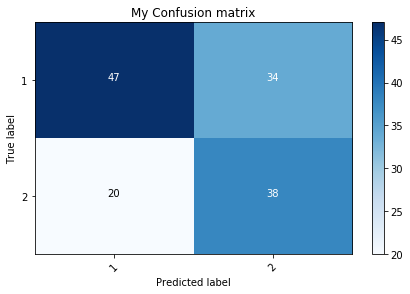

<Figure size 10800x7200 with 0 Axes>

In [52]:
cnf_matrix = confusion_matrix(y_test, predictions,classes)
np.set_printoptions(precision=2)
class_names = range(1,classes.size+1)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='My Confusion matrix')
classInfo = pd.DataFrame(data=[])

for i in range(0,classes.size):
    classInfo = classInfo.append([[classes[i],i+1]],ignore_index=True)
classInfo.columns=['Category','Index']
classInfo

##  

#### In continue I try to apply a NN approach for a better comparision in task 5 (Report Task).